In [1]:
import sys
sys.path.insert(1, '/home/nicolas/Stage/code/stage/src')
sys.path.insert(1, '/home/nicolas/Stage/code/stage/data')

from RBM_cont import RBMGausBer

import gzip
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda")
dtype = torch.float

In [2]:
f = gzip.open('./data/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, _, _ = p

X = torch.as_tensor(train_set[0][:10000,:].T, device = device, dtype = dtype)

In [3]:
Nv = X.shape[0] # numbder of visible nodes
Nh = 500 # number of hidden nodes
lr_W1 = 0.01 # learning rate
lr_W2 = 1e-4
NGibbs=100  # number of gibbs steps
n_mb = 500 # size of minibatches
n_pcd = n_mb # size of the negative chain

In [4]:
myRBM = RBMGausBer(num_visible=Nv,
				num_hidden=Nh,
				device=device,
				lr_W1=lr_W1,
                lr_W2=lr_W2,
				gibbs_steps=NGibbs,
				UpdCentered=True,
				mb_s=n_mb,
				num_pcd=n_pcd)


In [5]:
myRBM.SetVisBias(X)
myRBM.ResetPermChainBatch = True
stamp = 'testGaussianMNIST'
myRBM.file_stamp = stamp	
base = 1.7
v = np.array([0,1],dtype=int)
allm = np.append(np.array(0),base**np.array(list(range(30))))
for k in range(30):
	for m in allm:
		v = np.append(v,int(base**k)+int(m))

v = np.array(list(set(v)))
v = np.sort(v)
myRBM.list_save_time = v

ep_max = 1000
fq_msr_RBM = 1000
myRBM.list_save_rbm = np.arange(1,ep_max,fq_msr_RBM)	
myRBM.fit(X,ep_max=ep_max)

IT  0
Saving nb_upd=0
Saving nb_upd=1
Saving nb_upd=2
Saving nb_upd=3
Saving nb_upd=4
Saving nb_upd=5
Saving nb_upd=6
Saving nb_upd=8
Saving nb_upd=9
Saving nb_upd=10
Saving nb_upd=12
Saving nb_upd=14
Saving nb_upd=15
Saving nb_upd=16
Saving nb_upd=18
IT  1
Saving nb_upd=22
Saving nb_upd=24
Saving nb_upd=25
Saving nb_upd=26
Saving nb_upd=28
Saving nb_upd=32
Saving nb_upd=38
IT  2
Saving nb_upd=41
Saving nb_upd=42
Saving nb_upd=43
Saving nb_upd=45
Saving nb_upd=48
Saving nb_upd=49
Saving nb_upd=55
IT  3
Saving nb_upd=65
Saving nb_upd=69
Saving nb_upd=70
Saving nb_upd=71
Saving nb_upd=73
Saving nb_upd=77
IT  4
Saving nb_upd=82
Saving nb_upd=83
Saving nb_upd=93
IT  5
Saving nb_upd=110
Saving nb_upd=118
Saving nb_upd=119
IT  6
Saving nb_upd=120
Saving nb_upd=122
Saving nb_upd=126
Saving nb_upd=132
Saving nb_upd=138
IT  7
Saving nb_upd=142
Saving nb_upd=159
IT  8
IT  9
Saving nb_upd=187
IT  10
Saving nb_upd=201
Saving nb_upd=202
Saving nb_upd=203
Saving nb_upd=205
Saving nb_upd=209
Saving n

In [13]:
vinit = torch.normal(torch.zeros((myRBM.Nv,1000), device=myRBM.device, dtype=myRBM.dtype))
si,_ ,_,_ = myRBM.Sampling(vinit,it_mcmc=100)
i=0

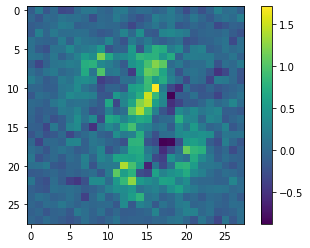

In [45]:
plt.imshow(si[:,i].view(28,28).cpu())
plt.colorbar()
i+=1

In [25]:
X[:,0].view(28,28).cpu()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000